In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [3]:
#csv_path = '2025-11-02_selected.csv'
csv_path = '/ocean/projects/asc170022p/mtragoza/lung-project/subjects.csv'
sel = pd.read_csv(csv_path)
sel

,dataset,subject,variant,method,u.norm,u.rms,u.rmse,u.nrmse,u.pcorr,u.scorr,...,u_isna,E_isna,corr_isna,res_isna,ucorr_isna,Ecorr_isna,res_order,u_order,E_order,failure_type
0,shapenet,wss.100f39dce7690f59efb94709f30ce0d2,2025-11-02,optimize,0.670816,1.128973,0.001666,0.001476,0.999999,0.997333,...,False,False,False,False,False,False,-0.0,-3.0,-1.0,ok
1,shapenet,wss.101354f9d8dede686f7b08d9de913afe,2025-11-02,optimize,0.622003,0.974864,0.001750,0.001795,0.999998,0.998717,...,False,False,False,False,False,False,-1.0,-3.0,-1.0,ok
2,shapenet,wss.1029fd5d71a06ea32ea98d69e91ba870,2025-11-02,optimize,0.849837,1.404901,0.002643,0.001881,0.999998,0.996461,...,False,False,False,False,False,False,0.0,-3.0,1.0,ok
3,shapenet,wss.102a6b7809f4e51813842bc8ef6fe18,2025-11-02,optimize,0.084750,0.128439,0.000404,0.003148,0.999994,0.997781,...,False,False,False,False,False,False,-1.0,-3.0,1.0,ok
4,shapenet,wss.107637b6bdf8129d4904d89e9169817b,2025-11-02,optimize,0.077659,0.257490,0.000958,0.003721,0.999993,0.973606,...,False,False,False,False,False,False,0.0,-2.0,-0.0,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,shapenet,wss.d81f943065391492a7e760c0b399301,2025-11-02,optimize,0.054318,0.143144,0.000460,0.003214,0.999995,0.991761,...,False,False,False,False,False,False,-2.0,-2.0,-0.0,ok
1111,shapenet,wss.d8d4004791c4f61b80fa98b5eeb7036c,2025-11-02,optimize,113.014772,188.533491,0.704888,0.003740,0.999992,0.995279,...,False,False,False,False,False,False,-2.0,-2.0,-1.0,ok
1112,shapenet,wss.e8add7acb28e2505fd40810f48721e8b,2025-11-02,optimize,0.205160,0.455321,0.000704,0.001546,0.999999,0.999229,...,False,False,False,False,False,False,0.0,-3.0,-0.0,ok
1113,shapenet,wss.f6420a3a3addd027f67be63aca8832dd,2025-11-02,optimize,0.108818,0.230946,0.000418,0.001809,0.999998,0.993666,...,False,False,False,False,False,False,-0.0,-3.0,-0.0,ok


In [4]:
base_dir = '2025-11-04_optimize'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config $NB/{config} --subject {subject} --output {output_path}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-02_config.json')
len(grid)

1115

In [5]:
base_dir = '2025-11-06_optimize'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config $NB/{config} --subject {subject} --output {output_path}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-05_config.json')
len(grid)

1115

In [6]:
base_dir = '2025-11-08_optimize' # fixed node labeling- use cell labels as GT, map cell -> point data, P0 scalars in forward sim

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config {config} --subject {subject} --output {output_path}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-05_config.json')
len(grid)

1115

In [7]:
base_dir = '2025-11-24_optimize' # post CVPR- new material catalog, rho known experiment

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py {config} \\
    --set dataset.examples.subjects={subject} \\
    --set optimization.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, rho_known=[True, False], variant='2025-11-20', config='2025-11-20_config.yaml')
len(grid)

2230

In [8]:
base_dir = '2026-01-13_optimize' # ECCV- full subject set

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py {config} \\
    --set dataset.examples.subjects={subject} \\
    --set optimization.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, rho_known=[True, False], variant='2025-01-05', config='2025-11-20_config.yaml')
len(grid)

2230

In [18]:
base_dir = '2026-01-13_optimize' # ECCV- uniform material prior, DICE score + rasterization

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH --mem=32G
#SBATCH -x v020
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py {config} \\
    --set dataset.examples.subjects={subject} \\
    --set optimization.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, rho_known=[True, False], variant='2026-01-15', config='2026-01-15_config.yaml')
len(grid)

2230

In [19]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)

jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.variant,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,8cb03f00498ceb7e,COMPLETED,1,37023259,w008,00:07:32,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-21T01:17:16,False,None,None
1,5063ce4526ce825f,COMPLETED,1,37023260,w003,00:07:34,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-21T01:17:16,False,None,None
2,b51e311be878d90f,COMPLETED,1,37023261,w003,00:07:34,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-21T01:17:16,False,None,None
3,8a7efcdf9af3aadb,COMPLETED,1,37023262,w003,00:07:36,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-21T01:17:16,False,None,None
4,7d66e5cef75938d1,COMPLETED,1,37023263,v029,00:06:31,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-21T01:17:16,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,f775bac7b8c23039,COMPLETED,1,37025486,v003,00:02:05,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-21T01:17:15,history,True,2026-01-21T10:54:24,False,None,None
2226,5f78eba81bd7201c,COMPLETED,1,37025487,v019,00:01:20,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-21T01:17:15,history,True,2026-01-21T10:54:24,False,None,None
2227,35ba3d1b38d48083,FAILED,1,37025488,v020,00:00:16,| └── 'lr': 0.0001\n └── 'trainer...,loss = fn(param)\n ^^^^^^^^^\n ...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-21T01:17:15,history,True,2026-01-21T10:54:24,False,None,None
2228,c7e0459d4315b6fa,COMPLETED,1,37025489,w002,00:01:18,└── 'residual': MeshField()\n ├── cells: Te...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-21T01:17:15,history,True,2026-01-21T10:54:24,False,None,None


In [20]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.variant,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
job_state,,,,,,,,,,,,,,,,,,,,,
COMPLETED,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115,...,2115,2115,0,327,2115,2115,2115,2115,0,0
FAILED,115,115,115,115,115,115,115,115,115,115,...,115,115,0,9,115,115,115,115,0,0


In [21]:
jobs = ps.collect(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.variant,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
job_state,,,,,,,,,,,,,,,,,,,,,
COMPLETED,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115,...,2115,2115,0,327,2115,2115,2115,2115,0,0
FAILED,115,115,115,115,115,115,115,115,115,115,...,115,115,0,9,115,115,115,115,0,0


In [22]:
j = 1
print(jobs[jobs.job_state == 'FAILED'].iloc[j])
print(jobs[jobs.job_state == 'FAILED'].iloc[j].stderr)

job_name                                             ad5d3b8d25748c54
job_state                                                      FAILED
n_submits                                                           1
job_id                                                       37023667
node_id                                                          v020
runtime                                                      00:00:17
stdout                  |   └── 'lr':     0.0001\n    └── 'trainer...
stderr                  loss = fn(param)\n           ^^^^^^^^^\n  ...
base_dir            /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir            /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path         /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path         /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir             /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path         /ocean/projects/asc170022p/mtragoza/lung-proje...
stderr_path         

In [23]:
jobs[jobs.job_state == 'FAILED'].node_id.unique()

array(['v020'], dtype=object)

In [24]:
#jobs.loc[:, 'job_id'] = pd.NA
#jobs = ps.submit(jobs)

In [25]:
%autoreload
ex_df = ps.outputs(jobs, output_name='outputs/example_metrics.csv', skip_errors=True)
ex_df

Job 8f58beaeb78b3f0a: file not found
Job ad5d3b8d25748c54: file not found
Job b95a43c88a6d0854: file not found
Job 6ff0f4f911de8aca: file not found
Job 2f57d50f2141f8f7: file not found
Job ae7f9179f7f6780f: file not found
Job de29936d093b7c55: file not found
Job 2213d07948a5b11f: file not found
Job 123902d45d5b768a: file not found
Job 979d031c10d0cfd8: file not found
Job 8b2fcbbb983fdc9e: file not found
Job 9837de30eda8e115: file not found
Job 5311a017177128a1: file not found
Job 3854e091c0841928: file not found
Job 9a30dd3df7e45f88: file not found
Job 624e8f866783df37: file not found
Job 7cc5f8b70afc5777: file not found
Job 49e7d4838e756b33: file not found
Job c6f927f419405b52: file not found
Job 13df0d78130d3f54: file not found
Job 20ffcca5462f3727: file not found
Job 731b52620da16241: file not found
Job 0f05c0af5371794c: file not found
Job 3a5dfe3b2efa9e22: file not found
Job 629cc295d78c72d2: file not found
Job d6b0ecd1cbabdce9: file not found
Job 43d71e8579070b3a: file not found
J

,epoch,phase,batch,step,loss,subject,num_voxels,E_vox.mean,E_vox.rms,E_vox.rmse,...,res_cell.mean,res_cell.rms,source_path,job_name,job_id,params_hash,params.subject,params.rho_known,params.variant,params.config
0,0,optimize,0,0,5.126796e-05,wss.100f39dce7690f59efb94709f30ce0d2,778627,7592.198101,7817.563347,763.853244,...,0.434870,0.805455,/ocean/projects/asc170022p/mtragoza/lung-proje...,8cb03f00498ceb7e,37023259,8cb03f00498ceb7e,wss.100f39dce7690f59efb94709f30ce0d2,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
1,0,optimize,0,0,9.159031e-04,wss.100f39dce7690f59efb94709f30ce0d2,778627,9938.001725,17889.134634,14988.697667,...,0.492825,0.939227,/ocean/projects/asc170022p/mtragoza/lung-proje...,5063ce4526ce825f,37023260,5063ce4526ce825f,wss.100f39dce7690f59efb94709f30ce0d2,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
2,0,optimize,0,0,7.786039e-05,wss.101354f9d8dede686f7b08d9de913afe,772180,5197.564963,6317.540937,1129.153312,...,0.074988,0.157347,/ocean/projects/asc170022p/mtragoza/lung-proje...,b51e311be878d90f,37023261,b51e311be878d90f,wss.101354f9d8dede686f7b08d9de913afe,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
3,0,optimize,0,0,4.239552e-04,wss.101354f9d8dede686f7b08d9de913afe,772180,6800.525827,8438.506966,2686.549284,...,0.092343,0.199046,/ocean/projects/asc170022p/mtragoza/lung-proje...,8a7efcdf9af3aadb,37023262,8a7efcdf9af3aadb,wss.101354f9d8dede686f7b08d9de913afe,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
4,0,optimize,0,0,6.738173e-05,wss.1029fd5d71a06ea32ea98d69e91ba870,243756,8401.279785,8595.876490,1108.180547,...,1.052944,1.712099,/ocean/projects/asc170022p/mtragoza/lung-proje...,7d66e5cef75938d1,37023263,7d66e5cef75938d1,wss.1029fd5d71a06ea32ea98d69e91ba870,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,0,optimize,0,0,1.031085e-07,wss.e8add7acb28e2505fd40810f48721e8b,232192,8847.105760,8923.039030,1171.632132,...,3.098569,4.274475,/ocean/projects/asc170022p/mtragoza/lung-proje...,275c05e55f6db4f3,37025485,275c05e55f6db4f3,wss.e8add7acb28e2505fd40810f48721e8b,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
2111,0,optimize,0,0,7.360678e-04,wss.e8add7acb28e2505fd40810f48721e8b,232192,7182.841006,7427.383019,2621.999312,...,2.281005,3.159035,/ocean/projects/asc170022p/mtragoza/lung-proje...,f775bac7b8c23039,37025486,f775bac7b8c23039,wss.e8add7acb28e2505fd40810f48721e8b,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
2112,0,optimize,0,0,6.129876e-08,wss.f6420a3a3addd027f67be63aca8832dd,667765,8953.750722,8976.207064,636.223434,...,0.427349,0.607750,/ocean/projects/asc170022p/mtragoza/lung-proje...,5f78eba81bd7201c,37025487,5f78eba81bd7201c,wss.f6420a3a3addd027f67be63aca8832dd,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
2113,0,optimize,0,0,5.987782e-06,wss.8826babe37996d5ba7ceedb2540a32b0,96422,5413.587136,6267.453040,1540.102414,...,0.002847,0.004249,/ocean/projects/asc170022p/mtragoza/lung-proje...,c7e0459d4315b6fa,37025489,c7e0459d4315b6fa,wss.8826babe37996d5ba7ceedb2540a32b0,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...


In [27]:
%autoreload
mat_df = ps.outputs(jobs, output_name='outputs/material_metrics.csv', skip_errors=True)
mat_df

Job 8f58beaeb78b3f0a: file not found
Job ad5d3b8d25748c54: file not found
Job b95a43c88a6d0854: file not found
Job 6ff0f4f911de8aca: file not found
Job 2f57d50f2141f8f7: file not found
Job ae7f9179f7f6780f: file not found
Job de29936d093b7c55: file not found
Job 2213d07948a5b11f: file not found
Job 123902d45d5b768a: file not found
Job 979d031c10d0cfd8: file not found
Job 8b2fcbbb983fdc9e: file not found
Job 9837de30eda8e115: file not found
Job 5311a017177128a1: file not found
Job 3854e091c0841928: file not found
Job 9a30dd3df7e45f88: file not found
Job 624e8f866783df37: file not found
Job 7cc5f8b70afc5777: file not found
Job 49e7d4838e756b33: file not found
Job c6f927f419405b52: file not found
Job 13df0d78130d3f54: file not found
Job 20ffcca5462f3727: file not found
Job 731b52620da16241: file not found
Job 0f05c0af5371794c: file not found
Job 3a5dfe3b2efa9e22: file not found
Job 629cc295d78c72d2: file not found
Job d6b0ecd1cbabdce9: file not found
Job 43d71e8579070b3a: file not found
J

,epoch,phase,batch,step,loss,subject,material,num_voxels,E_vox.mean,E_vox.rms,...,res_cell.mean,res_cell.rms,source_path,job_name,job_id,params_hash,params.subject,params.rho_known,params.variant,params.config
0,0,optimize,0,0,0.000051,wss.100f39dce7690f59efb94709f30ce0d2,4,263996,5204.095020,5238.282711,...,0.366763,0.716560,/ocean/projects/asc170022p/mtragoza/lung-proje...,8cb03f00498ceb7e,37023259,8cb03f00498ceb7e,wss.100f39dce7690f59efb94709f30ce0d2,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
1,0,optimize,0,0,0.000051,wss.100f39dce7690f59efb94709f30ce0d2,5,514631,8817.249956,8853.743740,...,0.470024,0.847700,/ocean/projects/asc170022p/mtragoza/lung-proje...,8cb03f00498ceb7e,37023259,8cb03f00498ceb7e,wss.100f39dce7690f59efb94709f30ce0d2,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
2,0,optimize,0,0,0.000916,wss.100f39dce7690f59efb94709f30ce0d2,4,263996,7930.514233,25398.514240,...,0.420042,0.838418,/ocean/projects/asc170022p/mtragoza/lung-proje...,5063ce4526ce825f,37023260,5063ce4526ce825f,wss.100f39dce7690f59efb94709f30ce0d2,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
3,0,optimize,0,0,0.000916,wss.100f39dce7690f59efb94709f30ce0d2,5,514631,10967.804959,12380.216028,...,0.530392,0.987241,/ocean/projects/asc170022p/mtragoza/lung-proje...,5063ce4526ce825f,37023260,5063ce4526ce825f,wss.100f39dce7690f59efb94709f30ce0d2,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
4,0,optimize,0,0,0.000078,wss.101354f9d8dede686f7b08d9de913afe,1,289381,1343.748188,1599.423063,...,0.045234,0.106819,/ocean/projects/asc170022p/mtragoza/lung-proje...,b51e311be878d90f,37023261,b51e311be878d90f,wss.101354f9d8dede686f7b08d9de913afe,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,1,18775,1561.528085,1921.512272,...,0.002137,0.003010,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
5615,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,2,23375,2934.458542,3257.650899,...,0.002286,0.003541,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
5616,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,3,3701,2889.843489,3029.344432,...,0.001018,0.001908,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...
5617,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,4,2355,5084.225608,5334.513747,...,0.001819,0.002460,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...


In [28]:
sys.path.append('../..')
import project.visual.matplotlib as mpl_viz
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# count missing values in each column
nnas = ex_df.isna().sum()
nnas

epoch                  0
phase                  0
batch                  0
step                   0
loss                   0
subject                0
num_voxels             0
E_vox.mean             0
E_vox.rms              0
E_vox.rmse             0
E_vox.nrmse            0
E_vox.srmse          316
E_vox.pcorr          316
E_vox.scorr          316
num_cells              0
volume                 0
rho_cell.mean          0
rho_cell.rms           0
rho_cell.rmse          0
rho_cell.nrmse         0
rho_cell.srmse      2115
rho_cell.pcorr      2115
rho_cell.scorr      2115
E_cell.mean            0
E_cell.rms             0
E_cell.rmse            0
E_cell.nrmse           0
E_cell.srmse         320
E_cell.pcorr         334
E_cell.scorr         334
u_cell.mean            0
u_cell.rms             0
u_cell.rmse            0
u_cell.nrmse           2
u_cell.srmse           2
u_cell.pcorr           2
u_cell.scorr           2
res_cell.mean          0
res_cell.rms           0
source_path            0


In [52]:
# count missing values and group by sets of missing columns

ex_df['has_na'] = ex_df.isna().any(axis=1)

ex_df['u_norm_isna'] = ex_df['u_cell.rms'].isna()
ex_df['u_corr_isna'] = ex_df['u_cell.pcorr'].isna()

ex_df['E_norm_isna'] = ex_df['E_cell.rms'].isna()
ex_df['E_srmse_isna'] = ex_df['E_cell.srmse'].isna()
ex_df['E_corr_isna'] = ex_df['E_cell.pcorr'].isna()

ex_df['rho_norm_isna'] = ex_df['rho_cell.rms'].isna()
ex_df['rho_corr_isna'] = ex_df['rho_cell.pcorr'].isna()

ex_df.groupby([
    'has_na',
    'E_norm_isna',
    'E_srmse_isna',
    'E_corr_isna',
    #'rho_norm_isna',
    #'rho_corr_isna',
    'u_norm_isna',
    'u_corr_isna',
]).count()

epoch  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna          
True   False       False        False       False       False         1781   
                                True        False       False           14   
                   True         True        False       False          318   
                                                        True             2   

                                                                     phase  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna          
True   False       False        False       False       False         1781   
                                True        False       False           14   
                   True         True        False       False          318   
                                                        True             2   

                                                                     batch  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna          
True   False       False        False       False       False         1781   
                                True        False       False           14   
                   True         True        False       False          318   
                                                        True             2   

                                                                     step  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna         
True   False       False        False       False       False        1781   
                                True        False       False          14   
                   True         True        False       False         318   
                                                        True            2   

                                                                     loss  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna         
True   False       False        False       False       False        1781   
                                True        False       False          14   
                   True         True        False       False         318   
                                                        True            2   

                                                                     subject  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna            
True   False       False        False       False       False           1781   
                                True        False       False             14   
                   True         True        False       False            318   
                                                        True               2   

                                                                     num_voxels  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna               
True   False       False        False       False       False              1781   
                                True        False       False                14   
                   True         True        False       False               318   
                                                        True                  2   

                                                                     E_vox.mean  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna               
True   False       False        False       False       False              1781   
                                True        False       False                14   
                   True         True        False       False               318   
                                                        True                  2   

                                                                     E_vox.rms  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna              
True   False       False        False       False       False             1781   
           

In [61]:
ex_df.groupby(['subject', 'params.rho_known']).count()

epoch  phase  batch  \
subject                              params.rho_known                        
wss.100f39dce7690f59efb94709f30ce0d2 False                 1      1      1   
                                     True                  1      1      1   
wss.101354f9d8dede686f7b08d9de913afe False                 1      1      1   
                                     True                  1      1      1   
wss.1029fd5d71a06ea32ea98d69e91ba870 False                 1      1      1   
...                                                      ...    ...    ...   
wss.ff6b0066981c6d894af9e9ae130751d4 True                  1      1      1   
wss.ff85695fd8907ce6e7e684d25d4dcaf0 False                 1      1      1   
                                     True                  1      1      1   
wss.ffe702c059d0fe5e6617a7fd9720002b False                 1      1      1   
                                     True                  1      1      1   

                                                       step  loss  num_voxels  \
subject                              params.rho_known                           
wss.100f39dce7690f59efb94709f30ce0d2 False                1     1           1   
                                     True                 1     1           1   
wss.101354f9d8dede686f7b08d9de913afe False                1     1           1   
                                     True                 1     1           1   
wss.1029fd5d71a06ea32ea98d69e91ba870 False                1     1           1   
...                                                     ...   ...         ...   
wss.ff6b0066981c6d894af9e9ae130751d4 True                 1     1           1   
wss.ff85695fd8907ce6e7e684d25d4dcaf0 False                1     1           1   
                                     True                 1     1           1   
wss.ffe702c059d0fe5e6617a7fd9720002b False                1     1           1   
                                     True                 1     1           1   

                                                       E_vox.mean  E_vox.rms  \
subject                              params.rho_known                          
wss.100f39dce7690f59efb94709f30ce0d2 False                      1          1   
                                     True                       1          1   
wss.101354f9d8dede686f7b08d9de913afe False                      1          1   
                                     True                       1          1   
wss.1029fd5d71a06ea32ea98d69e91ba870 False                      1          1   
...                                                           ...        ...   
wss.ff6b0066981c6d894af9e9ae130751d4 True                       1          1   
wss.ff85695fd8907ce6e7e684d25d4dcaf0 False                      1          1   
                                     True                       1          1   
wss.ffe702c059d0fe5e6617a7fd9720002b False                      1          1   
                                     True                       1          1   

                                                       E_vox.rmse  \
subject                              params.rho_known               
wss.100f39dce7690f59efb94709f30ce0d2 False                      1   
                                     True                       1   
wss.101354f9d8dede686f7b08d9de913afe False                      1   
                                     True                       1   
wss.1029fd5d71a06ea32ea98d69e91ba870 False                      1   
...                                                           ...   
wss.ff6b0066981c6d894af9e9ae130751d4 True                       1   
wss.ff85695fd8907ce6e7e684d25d4dcaf0 False                      1   
                                     True                       1   
wss.ffe702c059d0fe5e6617a7fd9720002b False                      1   
                                     True                       1   

                                               

In [74]:
single_mat = (
    mat_df
    .groupby(['subject', 'params.rho_known'])['material']
    .nunique()
    .reset_index(name='n_materials')
    .query('n_materials == 1')
)
single_mat

,subject,params.rho_known,n_materials
12,wss.111cb08c8121b8411749672386e0b711,False,1
13,wss.111cb08c8121b8411749672386e0b711,True,1
32,wss.1d4093ad2dfad9df24be2e4f911ee4af,False,1
33,wss.1d4093ad2dfad9df24be2e4f911ee4af,True,1
54,wss.1f4e56064de606093e746e5f1700ce1a,False,1
...,...,...,...
2074,wss.fa1e1a91e66faf411de55fee5ac2c5c2,True,1
2094,wss.fd1843119c00bec7a4e3429ccb8eaf16,False,1
2095,wss.fd1843119c00bec7a4e3429ccb8eaf16,True,1
2106,wss.fece234caccce98b35836c728d324152,False,1


In [ ]:
single_mat = (
    mat_df
    .groupby(['subject', 'params.rho_known'])['material']
    .nunique()
    .reset_index(name='n_materials')
    .query('n_materials == 1')
)
single_mat

In [93]:
single_mat_subjects = set(single_mat['subject'])
ex_df['single_mat'] = ex_df['subject'].isin(single_mat_subjects)

ex_df[ex_df['params.rho_known']].groupby([
    'has_na',
    'E_norm_isna',
    'E_srmse_isna',
    'E_corr_isna',
    #'rho_norm_isna',
    #'rho_corr_isna',
    'u_norm_isna',
    'u_corr_isna',
    'single_mat'
]).count()

epoch  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna single_mat          
True   False       False        False       False       False       False         887   
                                True        False       False       False          14   
                   True         True        False       False       False           2   
                                                                    True          155   
                                                        True        True            1   

                                                                                phase  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna single_mat          
True   False       False        False       False       False       False         887   
                                True        False       False       False          14   
                   True         True        False       False       False           2   
                                                                    True          155   
                                                        True        True            1   

                                                                                batch  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna single_mat          
True   False       False        False       False       False       False         887   
                                True        False       False       False          14   
                   True         True        False       False       False           2   
                                                                    True          155   
                                                        True        True            1   

                                                                                step  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna single_mat         
True   False       False        False       False       False       False        887   
                                True        False       False       False         14   
                   True         True        False       False       False          2   
                                                                    True         155   
                                                        True        True           1   

                                                                                loss  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna single_mat         
True   False       False        False       False       False       False        887   
                                True        False       False       False         14   
                   True         True        False       False       False          2   
                                                                    True         155   
                                                        True        True           1   

                                                                                subject  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna single_mat            
True   False       False        False       False       False       False           887   
                                True        False       False       False            14   
                   True         True        False       False       False             2   
                                                                    True            155   
                                                        True        True              1   

                                                                                num_voxels  \
has_na E_norm_isna E_srmse_isna E_corr_isna u_norm_isna u_corr_isna single_mat               
True   False       False        False       False       False       False              887   
                                True        False     

In [83]:
edge_cases = ex_df[
    ex_df['E_corr_isna'] & ~ex_df['single_mat']
]
edge_cases

,epoch,phase,batch,step,loss,subject,num_voxels,E_vox.mean,E_vox.rms,E_vox.rmse,...,ucorr_isna,Ecorr_isna,u_norm_isna,u_corr_isna,E_norm_isna,E_corr_isna,rho_norm_isna,rho_corr_isna,E_srmse_isna,single_mat
8,0,optimize,0,0,5.180661e-06,wss.107637b6bdf8129d4904d89e9169817b,278279,8810.701275,8904.355810,1416.896366,...,False,True,False,False,False,True,False,True,False,False
224,0,optimize,0,0,2.000378e-06,wss.313eedf7c6206738e535089b1cfcbf17,595459,8921.375754,8960.579280,897.949306,...,False,True,False,False,False,True,False,True,False,False
248,0,optimize,0,0,1.593528e-06,wss.334a54f9bfe49498aee28a20aa1ae6b2,214688,8948.043975,8973.976597,878.326691,...,False,True,False,False,False,True,False,True,False,False
288,0,optimize,0,0,1.999262e-10,wss.371b604f78300e02d76ab6ff59fe7e10,153072,6937.631896,7901.823575,2307.635220,...,False,True,False,False,False,True,False,True,True,False
289,0,optimize,0,0,6.963549e-05,wss.371b604f78300e02d76ab6ff59fe7e10,153072,5558.348576,6901.250355,3916.723213,...,False,True,False,False,False,True,False,True,True,False
636,0,optimize,0,0,1.915757e-05,wss.5cc77b60d5031886e904f922192a7caa,452838,8990.130163,8994.799220,1543.283985,...,False,True,False,False,False,True,False,True,False,False
653,0,optimize,0,0,1.980479e-04,wss.5db85dd849d52e1b55f9913e822d5318,408339,8988.053119,8993.505862,1659.319822,...,False,True,False,False,False,True,False,True,False,False
715,0,optimize,0,0,1.990036e-06,wss.65e604256f2535e58d40b9a7361804ed,245209,8945.414122,8972.643159,1033.758557,...,False,True,False,False,False,True,False,True,False,False
751,0,optimize,0,0,2.533548e-06,wss.692cda53e09fee2683fab87b95d22243,236093,8885.447831,8942.463837,2068.367057,...,False,True,False,False,False,True,False,True,False,False
883,0,optimize,0,0,1.761705e-05,wss.7bb11fb52bcba8ab68caf5ada882597a,587732,8951.654004,8975.286530,1096.065321,...,False,True,False,False,False,True,False,True,False,False


In [107]:
# determine if the single-material objects have a single region
import project
config = project.core.fileio.load_config('2026-01-15_config.yaml')
data_config = config.pop('dataset')
data_config['examples']['subjects'] = single_mat_subjects
data_config['selectors'] = {'input_image': 'uniform2'}
data_config

Loading 2026-01-15_config.yaml


{'name': 'ShapeNet',
 'root': '/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem',
 'examples': {'subjects': {'wss.111cb08c8121b8411749672386e0b711',
   'wss.1d4093ad2dfad9df24be2e4f911ee4af',
   'wss.1f4e56064de606093e746e5f1700ce1a',
   'wss.1f5c74f0a55cbf9798d5fc0473d00a1c',
   'wss.1febe89e0336d5bcee106795de609335',
   'wss.26669c159324543dfb65771025dd39c4',
   'wss.29880fedb8770d6ce51e3cd2b72fbf02',
   'wss.2a53c5c1eb517467e3bc44bb1006d615',
   'wss.2c0177660b7ecc915c118a000b931714',
   'wss.2c995984cdb23504bda72093f9b5aa73',
   'wss.2d1d1b66d6e268d8c67c3af5181fac2d',
   'wss.2d830fc20d8095cac2cc019b058015',
   'wss.2f2805663b44ae7c35836c728d324152',
   'wss.2f55f20282971f7125c70fb1df3f879b',
   'wss.2f9a502dafbaa50769cd744177574ad3',
   'wss.30a637a211d5c2f66e181e3da8402358',
   'wss.30bbf4c0046123dad8d2e2560dfff359',
   'wss.3297041a1a8de1d3d0f3f1f5f6accdb1',
   'wss.32e863f0d34384cc7ad908dd9229dac8',
   'wss.33100bfe3bbe750043b62415f5ba9dce',
   'wss.33428fb1b4d

In [108]:
examples = project.api.get_examples(data_config)
len(examples)

Gathering examples


165

In [ ]:
import numpy as np
import project.validation
project.core.utils.set_verbose(False)
ex_labels = {}
for ex in examples:
    region_mask = project.core.fileio.load_nibabel(ex.paths['region_mask']).get_fdata()
    material_mask = project.core.fileio.load_nibabel(ex.paths['material_mask']).get_fdata()
    region_labels = np.unique(region_mask[region_mask > 0])
    material_labels = np.unique(material_mask[material_mask > 0])
    ex_labels[ex.subject] = (len(region_labels), len(material_labels))

    val = project.validation.validate_example(ex)
    print(ex.subject, val['artifacts.scene.geometries'], len(region_labels), len(material_labels))


wss.1febe89e0336d5bcee106795de609335 2 1 1
wss.e5bd1675d43422bb61706e18472540d6 2 1 1
wss.caee92d9943a93bad3a8a0489b82a34e 4 1 1
wss.76bef187c092b6335ff61a3a2a0e2484 4 1 1
wss.4c617e5be0596ee2685998681d42efb8 2 1 1
wss.c29ceb4f2711534d9cbae40750f203a6 4 1 1
wss.3297041a1a8de1d3d0f3f1f5f6accdb1 4 1 1
wss.351dec75ac0619b1827473663798726a 2 1 1
wss.8b56cc59b433b83d42266d3d768f0d70 2 1 1
wss.96eb2c84ab3b8df0c175a98f27dc2236 2 1 1
wss.8bdea15ae5d929d0a2eb129d649f68cf 2 1 1
wss.1d4093ad2dfad9df24be2e4f911ee4af 2 1 1
wss.59e9b9d7aee400b13df325aac2f73830 4 1 1
wss.d92f30d9e38cf61ce69bbdea737daae6 2 1 1
wss.b748261bf05afa1e4dec1b3e5b450774 3 1 1
wss.2f9a502dafbaa50769cd744177574ad3 2 1 1
wss.26669c159324543dfb65771025dd39c4 3 1 1
wss.3a92a256ad1e060ec048697b91f69d2 4 1 1
wss.34e0bcd04523ae59d477567e8c8a6c59 2 1 1
wss.1f5c74f0a55cbf9798d5fc0473d00a1c 2 1 1
wss.49f9a29866f0177bcc4cd6c58bd35c0c 2 1 1
wss.ce04f39420c7c3e82fb82d326efadfe3 2 1 1
wss.d35ad6fe1db522f8593a35122199a8ce 2 1 1
wss.bde984ca

In [33]:
import numpy as np
ex_df['res_order'] = np.log10(ex_df['res_cell.rms'])
ex_df['u_order'] = np.log10(ex_df['u_cell.nrmse'])
ex_df['E_order'] = np.log10(ex_df['E_cell.nrmse'])
ex_df[['res_order', 'u_order', 'E_order']].describe().T

,count,mean,std,min,25%,50%,75%,max
res_order,2115.0,-0.598039,1.078335,-4.349373,-1.276255,-0.447608,0.327900,3.152449
u_order,2113.0,-2.581981,0.917694,-6.709777,-2.894417,-2.405352,-1.938351,-0.645344
E_order,2115.0,-0.941733,1.259966,-6.964542,-0.846042,-0.621998,-0.458451,0.719939


In [35]:
def classify_failure(row):
    if row['res_order'] > 2:
        return 'residual'
    elif row['u_order'] > 0:
        return 'u error hi'
    elif row['E_order'] > 0:
        return 'E error'
    return 'ok'

ex_df['failure_type'] = ex_df.apply(classify_failure, axis=1)
ex_df['failure_type'].value_counts()

failure_type
ok          2039
E error       72
residual       4
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='E_cell.nrmse'>

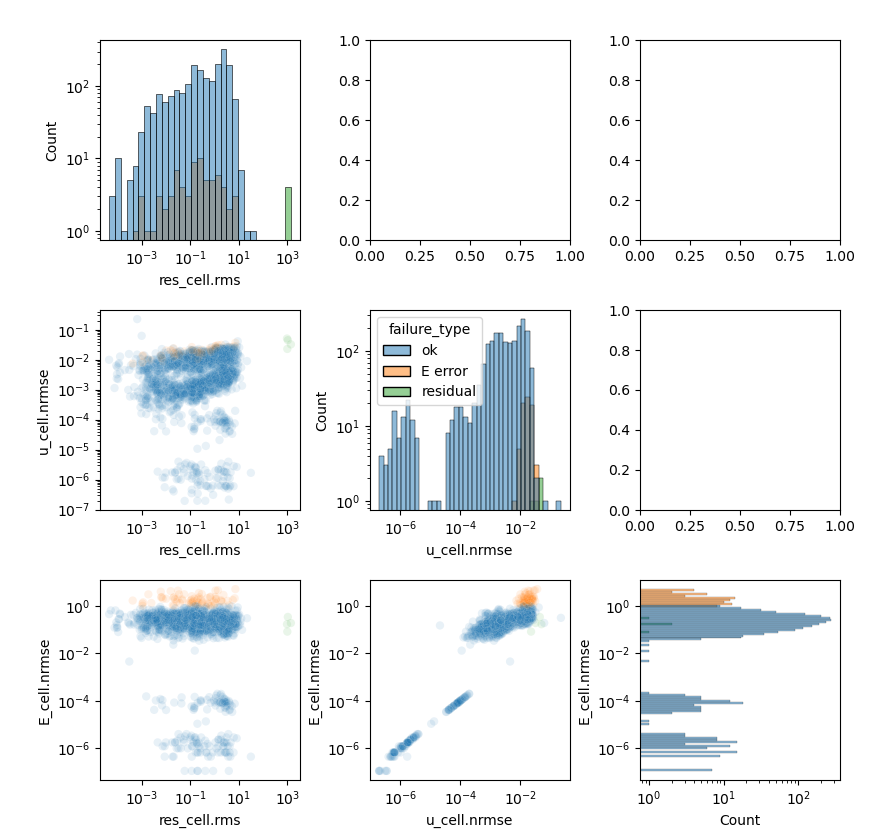

In [36]:
fig, axes = mpl_viz.subplot_grid(3, 3, ax_height=2, ax_width=2, padding=(1.0, 0.4, 0.6, 0.4), spacing=0.7) # lrbt

ax = axes[0,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(ex_df, x='res_cell.rms', hue='failure_type', legend=False, ax=ax)

ax = axes[1,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(ex_df, x='res_cell.rms', y='u_cell.nrmse', hue='failure_type', legend=False, ax=ax, alpha=0.1)

ax = axes[2,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(ex_df, x='res_cell.rms', y='E_cell.nrmse', hue='failure_type', legend=False, ax=ax, alpha=0.1)

ax = axes[1,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(ex_df, x='u_cell.nrmse', hue='failure_type', legend=True, ax=ax)

ax = axes[2,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(ex_df, x='u_cell.nrmse', y='E_cell.nrmse', hue='material', legend=False, ax=ax, alpha=0.1)

ax = axes[2,2]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(ex_df, y='E_cell.nrmse', hue='failure_type', legend=False, ax=ax)


In [39]:
ex_df.groupby(['params.rho_known'])[['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']].describe()

res_cell.rms                                           \
                        count      mean        std       min       25%   
params.rho_known                                                         
False                  1056.0  3.179288  44.435660  0.000045  0.049581   
True                   1059.0  3.613963  53.523725  0.000075  0.053694   

                                                 u_cell.nrmse            ...  \
                      50%       75%          max        count      mean  ...   
params.rho_known                                                         ...   
False             0.34171  2.023383  1061.894369       1055.0  0.011959  ...   
True              0.36851  2.198836  1420.524220       1058.0  0.001932  ...   

                                     E_cell.nrmse                      \
                       75%       max        count      mean       std   
params.rho_known                                                        
False             0.015451  0.050830       1056.0  0.479848  0.512090   
True              0.002324  0.226285       1059.0  0.141387  0.092532   

                                                                        
                           min       25%       50%       75%       max  
params.rho_known                                                        
False             1.457990e-01  0.280314  0.343133  0.449469  5.247339  
True              1.085069e-07  0.085815  0.142815  0.197412  0.692588  

[2 rows x 24 columns]

<Axes: xlabel='low E error', ylabel='mat_vox.dice'>

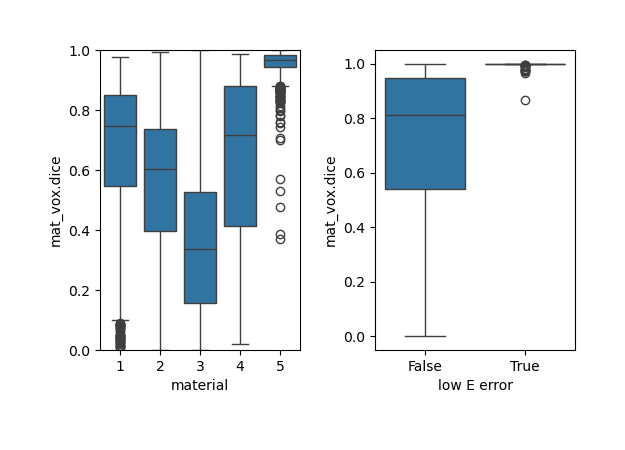

In [55]:
fig, axes = mpl_viz.subplot_grid(
    1, 2,
    ax_height=3,
    ax_width=2,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

sns.boxplot(
    mat_df[
        (mat_df['params.rho_known'] == True)
    ],
    x='material',
    y='mat_vox.dice',
    ax=axes[0,0]
)
axes[0,0].set_ylim(0.0, 1.0)

mat_df['low E error'] = mat_df['E_cell.nrmse'] < 1e-3

sns.boxplot(
    mat_df[
        (mat_df['params.rho_known'] == True)
    ],
    x='low E error',
    y='mat_vox.dice',
    ax=axes[0,1]
)

In [59]:
mat_df[

RangeIndex(start=0, stop=5619, step=1)

In [60]:
mat_df.groupby(['material'])['num_voxels'].count()

material
1    1629
2     989
3     450
4     440
5    2111
Name: num_voxels, dtype: int64

In [64]:
mat_df

,epoch,phase,batch,step,loss,subject,material,num_voxels,E_vox.mean,E_vox.rms,...,res_cell.rms,source_path,job_name,job_id,params_hash,params.subject,params.rho_known,params.variant,params.config,low E error
0,0,optimize,0,0,0.000051,wss.100f39dce7690f59efb94709f30ce0d2,4,263996,5204.095020,5238.282711,...,0.716560,/ocean/projects/asc170022p/mtragoza/lung-proje...,8cb03f00498ceb7e,37023259,8cb03f00498ceb7e,wss.100f39dce7690f59efb94709f30ce0d2,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
1,0,optimize,0,0,0.000051,wss.100f39dce7690f59efb94709f30ce0d2,5,514631,8817.249956,8853.743740,...,0.847700,/ocean/projects/asc170022p/mtragoza/lung-proje...,8cb03f00498ceb7e,37023259,8cb03f00498ceb7e,wss.100f39dce7690f59efb94709f30ce0d2,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
2,0,optimize,0,0,0.000916,wss.100f39dce7690f59efb94709f30ce0d2,4,263996,7930.514233,25398.514240,...,0.838418,/ocean/projects/asc170022p/mtragoza/lung-proje...,5063ce4526ce825f,37023260,5063ce4526ce825f,wss.100f39dce7690f59efb94709f30ce0d2,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
3,0,optimize,0,0,0.000916,wss.100f39dce7690f59efb94709f30ce0d2,5,514631,10967.804959,12380.216028,...,0.987241,/ocean/projects/asc170022p/mtragoza/lung-proje...,5063ce4526ce825f,37023260,5063ce4526ce825f,wss.100f39dce7690f59efb94709f30ce0d2,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
4,0,optimize,0,0,0.000078,wss.101354f9d8dede686f7b08d9de913afe,1,289381,1343.748188,1599.423063,...,0.106819,/ocean/projects/asc170022p/mtragoza/lung-proje...,b51e311be878d90f,37023261,b51e311be878d90f,wss.101354f9d8dede686f7b08d9de913afe,True,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,1,18775,1561.528085,1921.512272,...,0.003010,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
5615,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,2,23375,2934.458542,3257.650899,...,0.003541,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
5616,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,3,3701,2889.843489,3029.344432,...,0.001908,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False
5617,0,optimize,0,0,0.000014,wss.8826babe37996d5ba7ceedb2540a32b0,4,2355,5084.225608,5334.513747,...,0.002460,/ocean/projects/asc170022p/mtragoza/lung-proje...,32f69b777cb9f43a,37025490,32f69b777cb9f43a,wss.8826babe37996d5ba7ceedb2540a32b0,False,2026-01-15,/ocean/projects/asc170022p/mtragoza/lung-proje...,False


In [67]:
(mat_df.groupby(['subject'])['material'].nunique() == 1).sum()

np.int64(165)

In [68]:
mat_df['subject'].nunique()

1094

In [77]:
one_material = (mat_df.groupby(['subject'])['material'].nunique() == 1)
one_material_subjs = one_material[one_material == True]

one_material_rows = mat_df[mat_df.subject.isin(one_material_subjs.index)]

for i in range(1, 6):
    n = len(one_material_rows[one_material_rows.material == i])
    print(i, n)

1 0
2 0
3 4
4 0
5 312


In [53]:
mat_df.groupby('material')[['E_cell.nrmse', 'mat_vox.dice']]

material                      1           2           3           4  \
E_cell.nrmse count  1627.000000  987.000000  450.000000  440.000000   
             mean      2.070278    0.866889    0.485682    0.409417   
             std       1.880598    0.670580    0.327882    0.652383   
             min       0.171617    0.045557    0.000011    0.071368   
             25%       1.214062    0.518893    0.309632    0.181592   
             50%       1.674139    0.753964    0.401655    0.268972   
             75%       2.382731    1.025963    0.575375    0.411845   
             max      41.601192   11.510675    4.008675    7.295627   
mat_vox.dice count  1629.000000  989.000000  450.000000  440.000000   
             mean      0.654669    0.486783    0.289071    0.524951   
             std       0.239235    0.243924    0.204757    0.288508   
             min       0.006790    0.000000    0.000000    0.000000   
             25%       0.527322    0.310926    0.120721    0.291955   
             50%       0.718548    0.510181    0.252970    0.563721   
             75%       0.841823    0.685516    0.431911    0.769309   
             max       0.987669    0.993759    1.000000    0.988219   

material                       5  
E_cell.nrmse count  2.111000e+03  
             mean   2.661289e-01  
             std    3.791662e-01  
             min    1.085069e-07  
             25%    9.683185e-02  
             50%    1.958498e-01  
             75%    3.169583e-01  
             max    5.365852e+00  
mat_vox.dice count  2.111000e+03  
             mean   9.296404e-01  
             std    1.080289e-01  
             min    5.740762e-03  
             25%    9.221580e-01  
             50%    9.613732e-01  
             75%    9.818988e-01  
             max    1.000000e+00

In [ ]:
ax = axes[2,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(ex_df, x='u_cell.nrmse', y='E_cell.nrmse', hue='failure_type', legend=False, ax=ax, alpha=0.1)


ValueError: Could not interpret value `res_cell.rms` for `y`. An entry with this name does not appear in `data`.

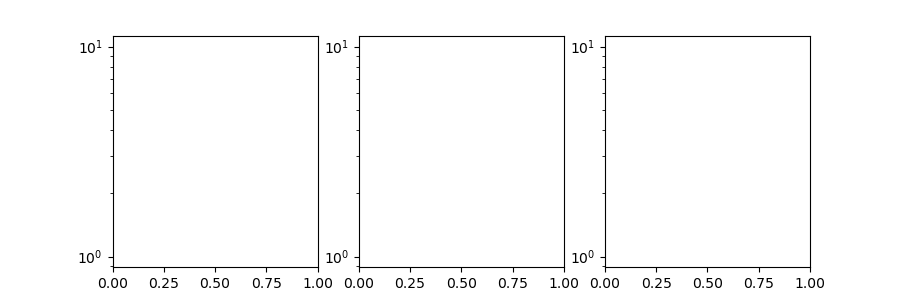

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(9,3))
plot_fn = sns.boxplot
for ax in axes:
    ax.set_yscale('log')
plot_fn(df, x='params.rho_known', y='res_cell.rms', ax=axes[0])
plot_fn(df, x='params.rho_known', y='u_cell.nrmse', ax=axes[1])
plot_fn(df, x='params.rho_known', y='E_cell.nrmse', ax=axes[2])
fig.tight_layout()